In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import accuracy_score

In [2]:
import glob

# Step 1: Read all Excel files into DataFrames and store them with their respective table names
table_dfs = {}
for file_path in glob.glob('D:\OneDrive - Students RWTH Aachen University\PADS thesis topic\SAPDataset\ML Features files\ML table labels/*.xlsx'):
    table_name = file_path.split('\\')[-1].split('.')[0]  # Extract table name from file path
    table_dfs[table_name] = pd.read_excel(file_path)

In [3]:
table_dfs.keys()

dict_keys(['BKPF_train', 'Eban_train', 'EKKO_train', 'LIKP_train', 'MKPF_train', 'RBKP_train', 'VBAK_train', 'VBRK_train'])

In [12]:
# Loop through the DataFrames in the dictionary
for df_name, df in table_dfs.items():
    # Extract the first 4 characters of the DataFrame name
    table_name = df_name[:4]
    # Add a 'Table Name' column with the first 4 characters of the DataFrame name
    df['Table Name'] = table_name

# Concatenate the DataFrames vertically into a single DataFrame
combined_df = pd.concat(table_dfs.values(), ignore_index=True)

In [15]:
combined_df.to_csv('ML_Col_Labels_Combined_05092023.csv', index = False)

# MAIN

In [25]:
clustered_data = pd.read_csv('ML_GMM_Clustered_COLS_05092023.csv')
labels_data = pd.read_csv('ML_Col_Labels_Combined_05092023.csv')

In [26]:
clustered_data.head()

,table_name,col_name,Cluster
0,BKPF,AEDAT,D
1,BKPF,ARCID,A
2,BKPF,AWKEY,A
3,BKPF,AWTYP,A
4,BKPF,BASW2,A


In [27]:
labels_data.head()

,Category Number,Column Name,Category,Explanation,Table Name
0,0,MANDT,CASEID,Client (Identifying information for the case o...,BKPF
1,0,BUKRS,Activity,Company Code (Potentially an activity),BKPF
2,0,BELNR,CASEID,Accounting Document Number (Identifying inform...,BKPF
3,0,GJAHR,Timestamp,Fiscal Year (Timestamp or date information),BKPF
4,2,BLART,Activity,Document Type (Potentially an activity),BKPF


In [29]:
# Merge cluster assignments with true labels
merged_data = pd.merge(clustered_data, labels_data, left_on=['table_name', 'col_name'],
                                    right_on = ['Table Name', 'Column Name'] ,how='inner')


In [30]:
merged_data

,table_name,col_name,Cluster,Category Number,Column Name,Category,Explanation,Table Name
0,BKPF,AEDAT,D,2,AEDAT,Timestamp,Date of Last Change (Timestamp or date informa...,BKPF
1,BKPF,ARCID,A,3,ARCID,Activity,Archive ID (Potentially an activity),BKPF
2,BKPF,AWKEY,A,2,AWKEY,Activity,Reference Key for Line Item (Potentially an ac...,BKPF
3,BKPF,AWTYP,A,2,AWTYP,Activity,Reference Procedure for Document Entry (Potent...,BKPF
4,BKPF,BASW2,A,3,BASW2,Activity,2nd Local Currency Translation Method (Potenti...,BKPF
...,...,...,...,...,...,...,...,...
285,VBRK,VTWEG,A,3,VTWEG,Activity,Distribution Channel (Potentially an activity),VBRK
286,VBRK,WAERK,D,3,WAERK,Activity,Currency Key (Potentially an activity),VBRK
287,VBRK,ZLSCH,A,3,ZLSCH,Activity,Payment Method (Potentially an activity),VBRK
288,VBRK,ZTERM,A,2,ZTERM,Activity,Terms of Payment Key (Potentially an activity),VBRK


In [36]:
np.unique(merged_data['Cluster'])

array(['A', 'B', 'C', 'D'], dtype=object)

In [37]:
np.unique(merged_data['Category Number'])

array([0, 1, 2, 3], dtype=int64)

In [45]:
clusters = ['A', 'B', 'C', 'D']
results_df = pd.DataFrame(columns=clusters + ['Accuracy'])

In [46]:
# Generate all permutations of category assignments to clusters
permutations = list(itertools.permutations([0, 1, 2, 3]))

In [47]:
# Iterate through permutations and calculate BCE
for perm in permutations:
    df = merged_data.copy()
    assignment_mapping = dict(zip(clusters, perm))  # Map clusters to categories
    print(assignment_mapping)
    df['Cluster'] = df['Cluster'].map(assignment_mapping)
    print(np.unique(df['Cluster']))
    print(np.unique(df['Category Number']))
    # Calculate BCE for each column
    # Get the unique classes present in the current assignment
    # current_unique_classes = df['Category Number'].unique()

    accuracy = accuracy_score(df['Category Number'], df['Cluster'])

    # Append results to the DataFrame
    result_row = list(perm) + [accuracy]
    results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)

# Print the results DataFrame
# print(results_df)
    # predicted_labels = [assignment_mapping[cluster] for cluster in clusters]

{'A': 0, 'B': 1, 'C': 2, 'D': 3}
[0 1 2 3]
[0 1 2 3]
{'A': 0, 'B': 1, 'C': 3, 'D': 2}
[0 1 2 3]
[0 1 2 3]
{'A': 0, 'B': 2, 'C': 1, 'D': 3}
[0 1 2 3]
[0 1 2 3]
{'A': 0, 'B': 2, 'C': 3, 'D': 1}
[0 1 2 3]
[0 1 2 3]
{'A': 0, 'B': 3, 'C': 1, 'D': 2}
[0 1 2 3]
[0 1 2 3]
{'A': 0, 'B': 3, 'C': 2, 'D': 1}
[0 1 2 3]
[0 1 2 3]
{'A': 1, 'B': 0, 'C': 2, 'D': 3}
[0 1 2 3]
[0 1 2 3]
{'A': 1, 'B': 0, 'C': 3, 'D': 2}
[0 1 2 3]
[0 1 2 3]
{'A': 1, 'B': 2, 'C': 0, 'D': 3}
[0 1 2 3]
[0 1 2 3]
{'A': 1, 'B': 2, 'C': 3, 'D': 0}
[0 1 2 3]
[0 1 2 3]
{'A': 1, 'B': 3, 'C': 0, 'D': 2}
[0 1 2 3]
[0 1 2 3]
{'A': 1, 'B': 3, 'C': 2, 'D': 0}
[0 1 2 3]
[0 1 2 3]
{'A': 2, 'B': 0, 'C': 1, 'D': 3}
[0 1 2 3]
[0 1 2 3]
{'A': 2, 'B': 0, 'C': 3, 'D': 1}
[0 1 2 3]
[0 1 2 3]
{'A': 2, 'B': 1, 'C': 0, 'D': 3}
[0 1 2 3]
[0 1 2 3]
{'A': 2, 'B': 1, 'C': 3, 'D': 0}
[0 1 2 3]
[0 1 2 3]
{'A': 2, 'B': 3, 'C': 0, 'D': 1}
[0 1 2 3]
[0 1 2 3]
{'A': 2, 'B': 3, 'C': 1, 'D': 0}
[0 1 2 3]
[0 1 2 3]
{'A': 3, 'B': 0, 'C': 1, 'D': 2}
[0 1 2 3]
[0 

C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_8440\1521468801.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)
C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_8440\1521468801.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)
C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_8440\1521468801.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)
C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_8440\1521468801.p

In [48]:
results_df.loc[results_df['Accuracy'] == max(results_df['Accuracy']) ]

,A,B,C,D,Accuracy
18,3.0,0.0,1.0,2.0,0.455172


In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = merged_data.copy()
# Define the true labels (categories) and predicted labels (clusters)
true_labels = df['Category Number']
df['Cluster']= df['Cluster'].map({'A': 3, 'B': 0, 'C': 1, 'D': 2})
predicted_labels = df['Cluster']
# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
confusion
# Create a DataFrame for better visualization
# confusion_df = pd.DataFrame(confusion, columns=['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D'], index=['Category 0', 'Category 1', 'Category 2', 'Category 3'])

# print(confusion_df)

array([[ 5,  1, 12,  4],
       [ 0,  1, 30,  0],
       [ 0,  0, 43, 80],
       [ 1,  0, 30, 83]], dtype=int64)

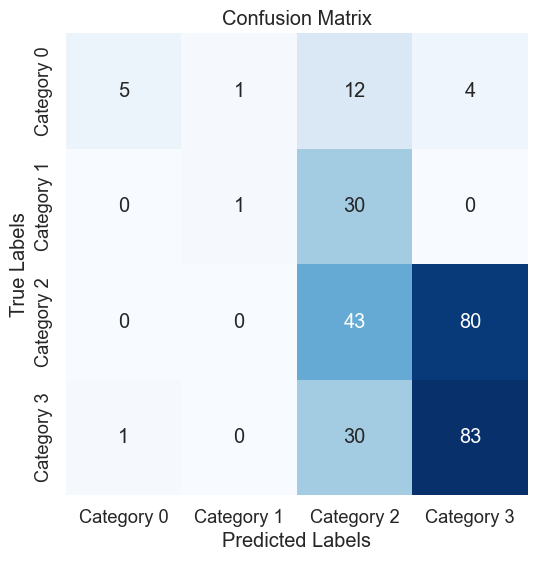

In [56]:
# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['Category 0', 'Category 1', 'Category 2', 'Category 3']

# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of the prediction classes based on unsupervised learning method')

# Display the plot
plt.show()

In [58]:
np.unique(true_labels , return_counts = True)

(array([0, 1, 2, 3], dtype=int64), array([ 22,  31, 123, 114], dtype=int64))

In [57]:
from sklearn.metrics import classification_report

# Calculate precision, recall, F1-score, and support
report = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(report).transpose()

# Print the metrics
print(metrics_df)

              precision    recall  f1-score     support
Category 0     0.833333  0.227273  0.357143   22.000000
Category 1     0.500000  0.032258  0.060606   31.000000
Category 2     0.373913  0.349593  0.361345  123.000000
Category 3     0.497006  0.728070  0.590747  114.000000
accuracy       0.455172  0.455172  0.455172    0.455172
macro avg      0.551063  0.334299  0.342460  290.000000
weighted avg   0.470632  0.455172  0.419057  290.000000
